# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [9]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [10]:
def percep_fit(X, target, th=0, a=1, max_epoch=10, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1

    if verbose:
      print('\nEpoch', epoch)
      
    for r, row in enumerate(X):
      y_in = np.dot(row, w)
      y = percep_step(y_in, th)
      if y != target[r]:
        stop = False
        w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
      if verbose:
        print('Bobot:', w)
      if draw:
        plot(line(w, th), line(w, -th), X, target)
  return w, epoch


### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [11]:
def percep_predict(X, w, th=0):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)
        Y.append(y)
    return Y

In [12]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)


## Soal


Gunakan dataset "data.csv" yang telah dilampirkan

In [13]:
# from google.colab import files

# data = files.upload()
# for fn in data.keys():
#   print('Nama file "{name}" dengan panjang {length} bytes'.format(name=fn, length=len(data[fn])))


In [14]:
import pandas as pd

data = pd.read_csv("data.csv")

Kolom Activity berperan sebagai label dan memiliki beberapa kelas:
1. SITTING
2. LAYING
3. WALKING
4. STANDING
5. WALKING_DOWNSTAIRS
6. WALKING_UPSTAIRS

Hapuslah kelas hingga hanya nyisakan kelas: *Asprak isi tergantung kelas*

In [15]:
data = data[~data['Activity'].isin(['WALKING','STANDING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])] #Praktikan menghapus kelas kelas yang tidak digunakan

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = data[['x', 'y', 'z']].to_numpy()
X = minmax_scale(X)

y = data['Activity'].to_numpy()
c = {'SITTING': -1, 'LAYING': 1} # Praktikan mengubah kedua kelas target  menjadi 1 dan -1
y = [c[i] for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=10, test_size=.3)


Epoch 1
Bobot: [0.0001, 8.347900479005811e-05, 6.605944904502177e-05, 6.605853341857351e-05]


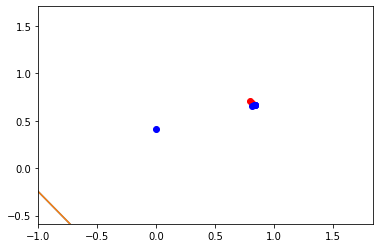

Bobot: [0.0, 2.000255898005715e-06, -2.9961137090953315e-06, 4.964416644787805e-06]


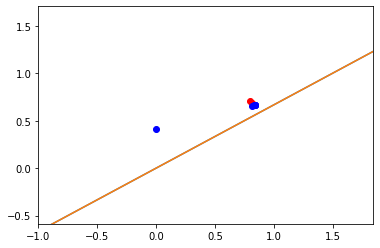

Bobot: [-0.0001, -7.79638744412268e-05, -7.351923048770051e-05, -5.122139722334195e-05]


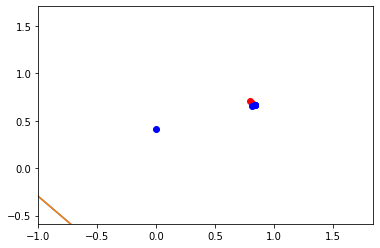

Bobot: [0.0, -7.79638744412268e-05, -3.2261077009193125e-05, 3.617247818547389e-05]


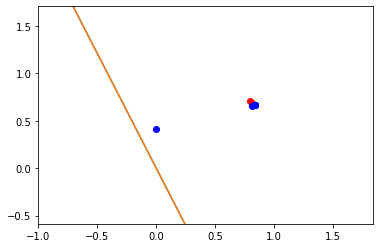


Epoch 2
Bobot: [0.0001, 5.515130348831315e-06, 3.379837203582865e-05, 0.0001022310116040474]


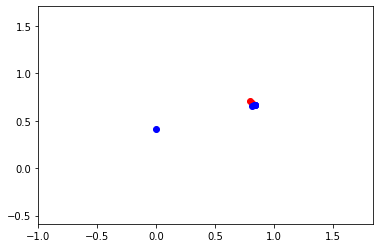

Bobot: [0.0, -7.596361854322108e-05, -3.525719071828846e-05, 4.1136894830261694e-05]


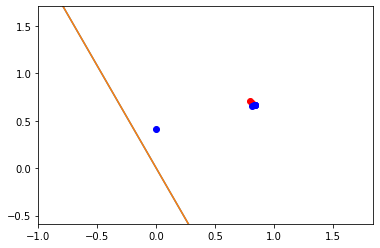

Bobot: [0.0001, 5.682168922866354e-06, 3.03328950652459e-05, 0.00010869125021612768]


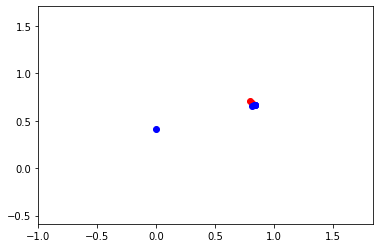

Bobot: [0.0, -7.428196141636616e-05, -4.019022171335928e-05, 5.250543634799792e-05]


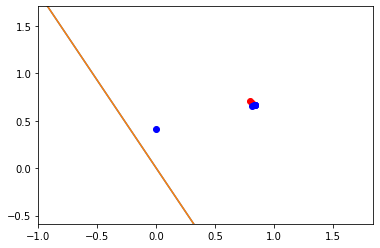


Epoch 3
Bobot: [0.0001, 9.197043373691954e-06, 2.5869227331662493e-05, 0.00011856396976657143]


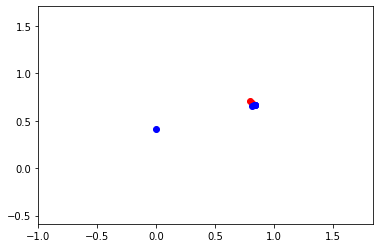

Bobot: [0.0, -7.228170551836044e-05, -4.318633542245461e-05, 5.746985299278573e-05]


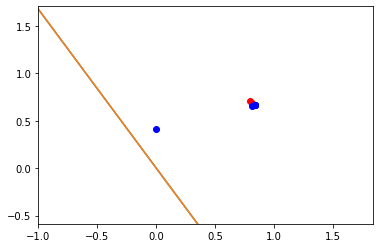

Bobot: [0.0001, 9.364081947726993e-06, 2.2403750361079744e-05, 0.0001250242083786517]


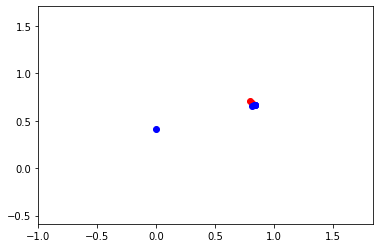

Bobot: [0.0, -7.060004839150552e-05, -4.8119366417525436e-05, 6.883839451052195e-05]


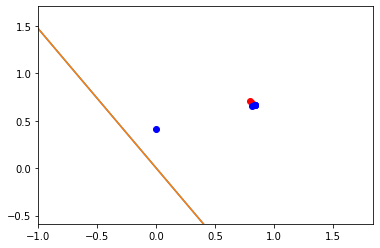


Epoch 4
Bobot: [0.0001, 1.2878956398552593e-05, 1.7940082627496338e-05, 0.00013489692792909545]


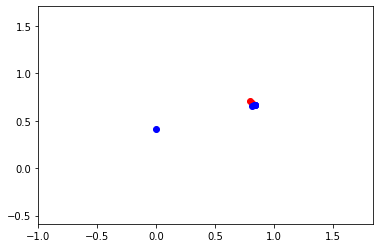

Bobot: [0.0, -6.85997924934998e-05, -5.111548012662077e-05, 7.380281115530975e-05]


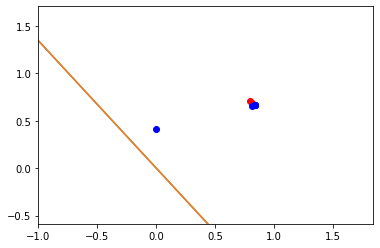

Bobot: [0.0001, 1.3045994972587632e-05, 1.4474605656913589e-05, 0.00014135716654117573]


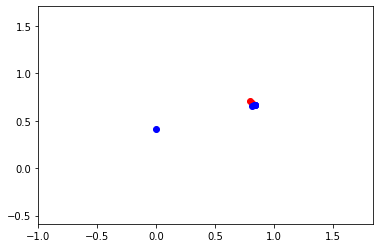

Bobot: [0.0, -6.691813536664488e-05, -5.604851112169159e-05, 8.517135267304597e-05]


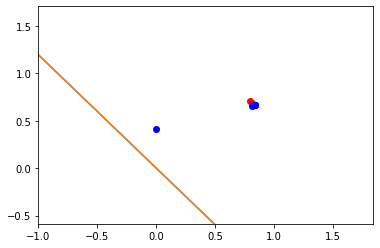


Epoch 5
Bobot: [0.0001, 1.656086942341323e-05, 1.0010937923330183e-05, 0.00015122988609161947]


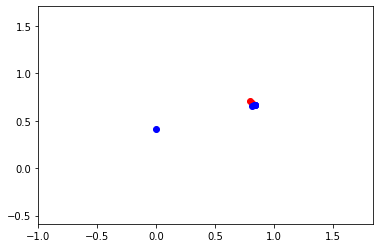

Bobot: [0.0, -6.491787946863917e-05, -5.904462483078692e-05, 9.013576931783377e-05]


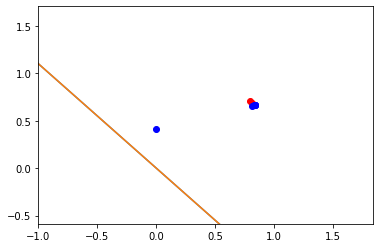

Bobot: [0.0001, 1.672790799744827e-05, 6.545460952747434e-06, 0.00015769012470369975]


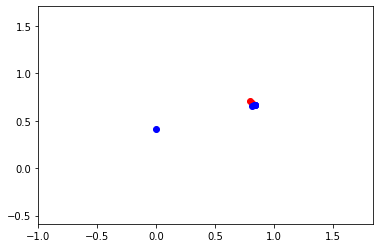

Bobot: [0.0, -6.323622234178424e-05, -6.397765582585775e-05, 0.00010150431083557]


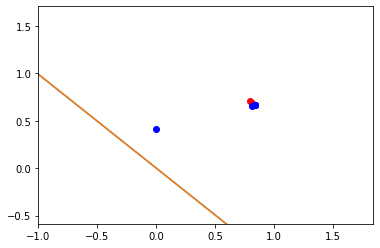


Epoch 6
Bobot: [0.0001, 2.024278244827387e-05, 2.0817932191640273e-06, 0.0001675628442541435]


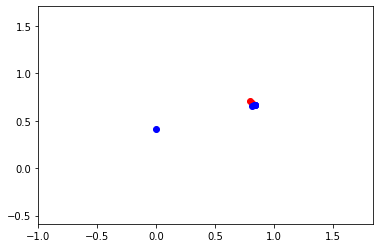

Bobot: [0.0, -6.123596644377853e-05, -6.697376953495308e-05, 0.00010646872748035778]


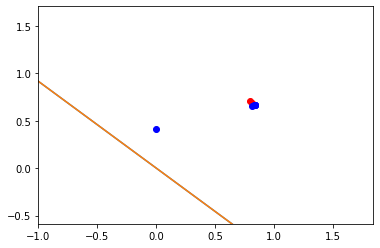

Bobot: [0.0001, 2.040982102230891e-05, -1.3836837514187214e-06, 0.00017402308286622377]


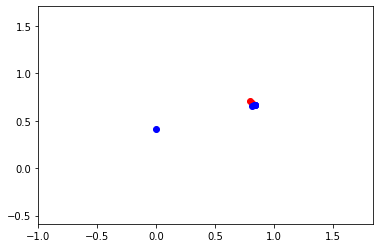

Bobot: [0.0, -5.95543093169236e-05, -7.19068005300239e-05, 0.00011783726899809401]


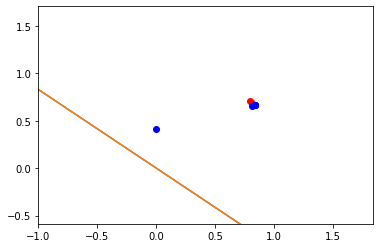


Epoch 7
Bobot: [0.0001, 2.392469547313451e-05, -5.847351485002128e-06, 0.0001838958024166675]


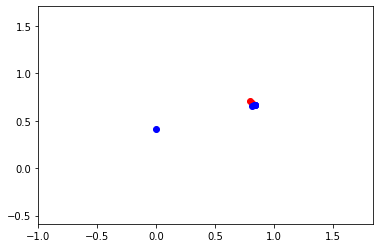

Bobot: [0.0, -5.755405341891789e-05, -7.490291423911923e-05, 0.0001228016856428818]


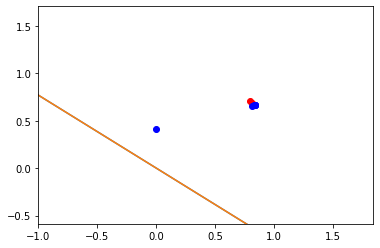

Bobot: [0.0001, 2.409173404716955e-05, -9.312828455584877e-06, 0.00019035604102874776]


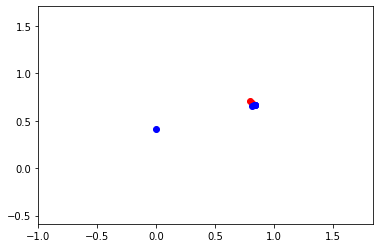

Bobot: [0.0, -5.5872396292062964e-05, -7.983594523419006e-05, 0.000134170227160618]


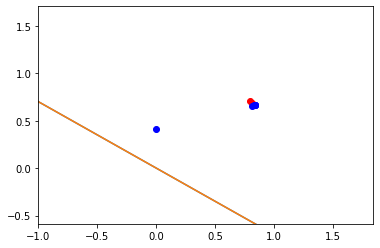


Epoch 8
Bobot: [0.0001, 2.760660849799515e-05, -1.3776496189168283e-05, 0.00020022876057919153]


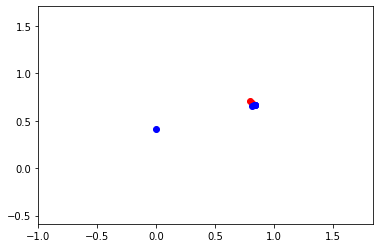

Bobot: [0.0, -5.387214039405725e-05, -8.283205894328539e-05, 0.0001391346438054058]


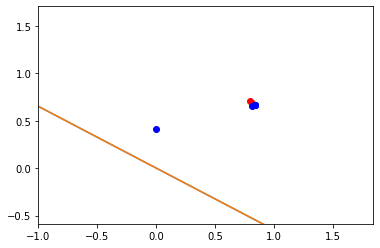

Bobot: [0.0001, 2.7773647072030187e-05, -1.7241973159751032e-05, 0.00020668899919127178]


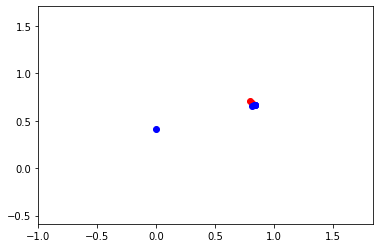

Bobot: [0.0, -5.2190483267202325e-05, -8.776508993835621e-05, 0.00015050318532314202]


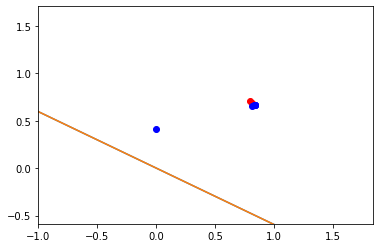


Epoch 9
Bobot: [0.0001, 3.128852152285579e-05, -2.170564089333444e-05, 0.00021656171874171555]


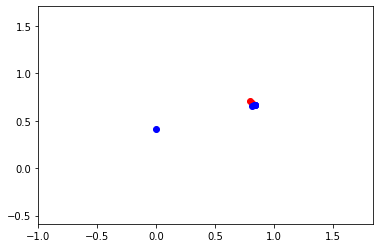

Bobot: [0.0, -5.019022736919661e-05, -9.076120364745154e-05, 0.00015546760196792983]


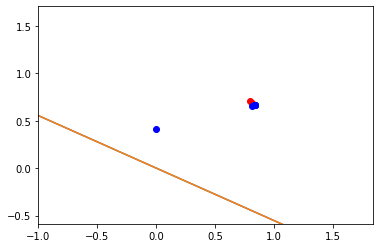

Bobot: [0.0001, 3.41186347234606e-05, -2.4230482939680153e-05, 0.00022059420741300166]


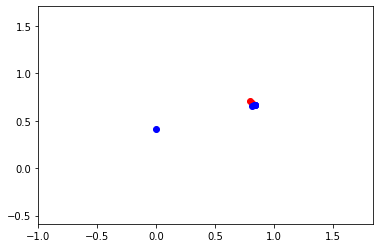

Bobot: [0.0, -4.584549561577191e-05, -9.475359971828533e-05, 0.0001644083935448719]


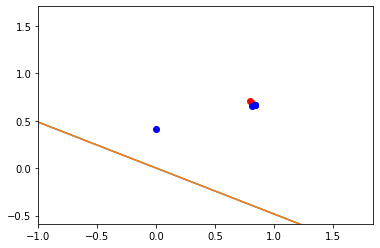

Bobot: [-0.0001, -0.00012904443803304504, -0.0001607500744971772, 9.781801748405669e-05]


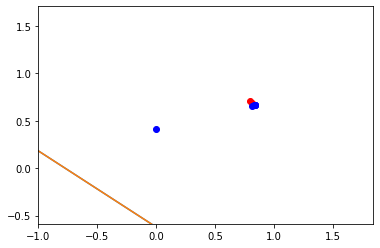


Epoch 10
Bobot: [0.0, -4.5565433242986925e-05, -9.469062545215543e-05, 0.00016387655090263018]


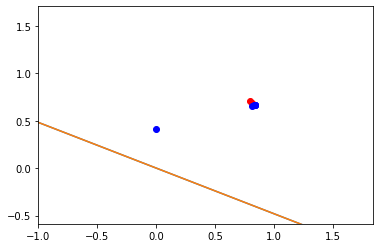

Bobot: [-0.0001, -0.00012876437566026008, -0.0001606871002310473, 9.728617484181497e-05]


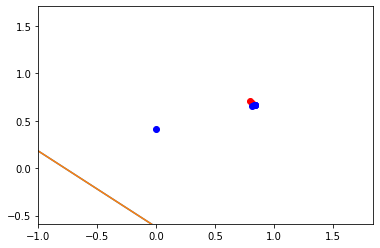

Epochs: 10
Accuracy: 0.4430379746835443


In [17]:
w, epoch = percep_fit(X_train, y_train, a=0.0001 , verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 0.0001
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [1.0, 0.8347900479005811, 0.6605944904502177, 0.6605853341857351]


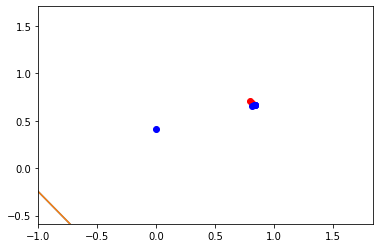

Bobot: [0.0, 0.020002558980057095, -0.029961137090953383, 0.04964416644787806]


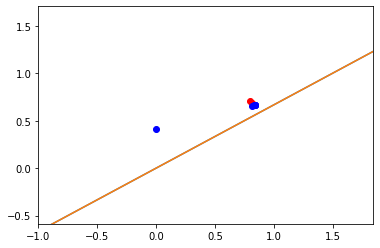

Bobot: [-1.0, -0.779638744412268, -0.7351923048770052, -0.5122139722334195]


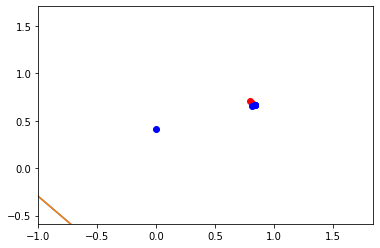

Bobot: [0.0, -0.779638744412268, -0.32261077009193134, 0.3617247818547389]


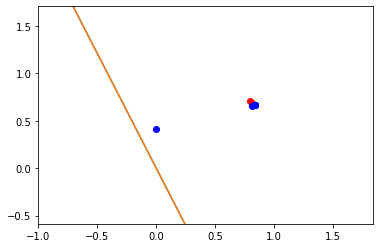


Epoch 2
Bobot: [1.0, 0.0551513034883131, 0.33798372035828633, 1.022310116040474]


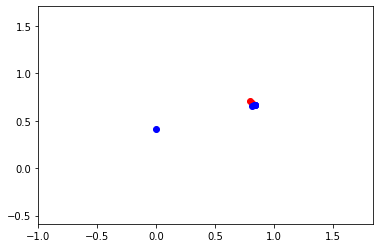

Bobot: [0.0, -0.7596361854322109, -0.3525719071828847, 0.41136894830261694]


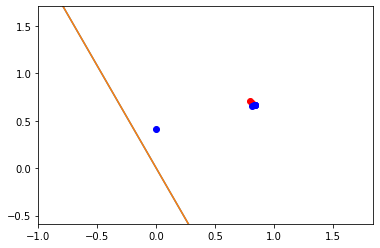

Bobot: [1.0, 0.056821689228663486, 0.30332895065245885, 1.0869125021612769]


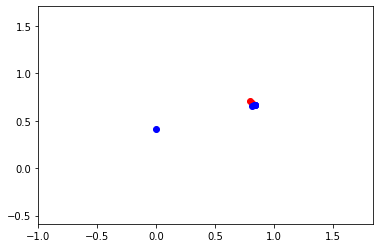

Bobot: [0.0, -0.7428196141636616, -0.4019022171335929, 0.5250543634799794]


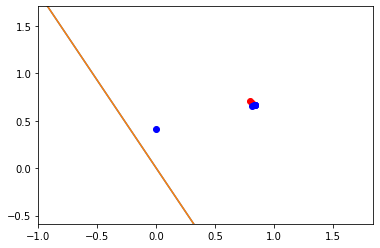


Epoch 3
Bobot: [1.0, 0.09197043373691949, 0.25869227331662475, 1.1856396976657144]


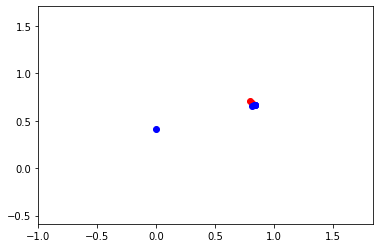

Bobot: [0.0, -0.7228170551836045, -0.4318633542245463, 0.5746985299278574]


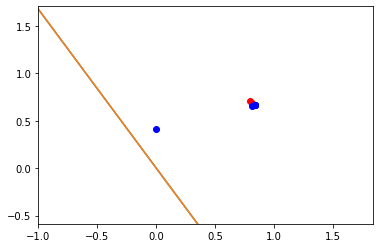

Bobot: [1.0, 0.09364081947726988, 0.22403750361079727, 1.2502420837865174]


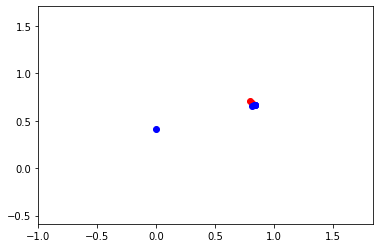

Bobot: [0.0, -0.7060004839150552, -0.4811936641752545, 0.6883839451052198]


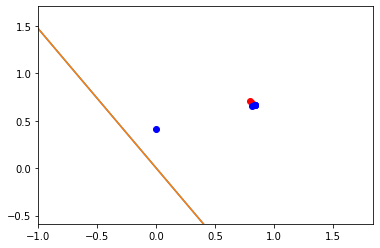


Epoch 4
Bobot: [1.0, 0.12878956398552588, 0.17940082627496318, 1.348969279290955]


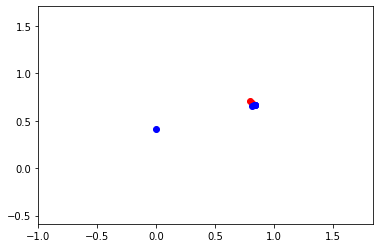

Bobot: [0.0, -0.6859979249349981, -0.5111548012662079, 0.7380281115530979]


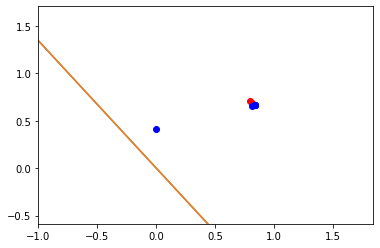

Bobot: [1.0, 0.13045994972587627, 0.14474605656913564, 1.4135716654117578]


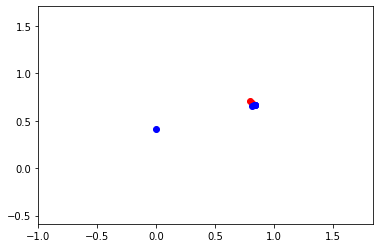

Bobot: [0.0, -0.6691813536664488, -0.5604851112169161, 0.8517135267304603]


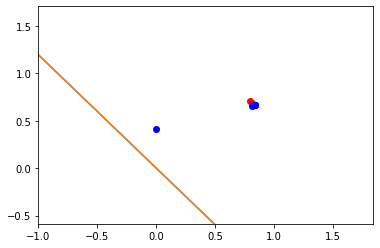


Epoch 5
Bobot: [1.0, 0.16560869423413227, 0.10010937923330154, 1.5122988609161954]


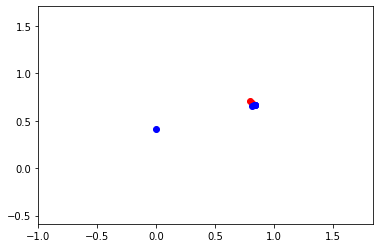

Bobot: [0.0, -0.6491787946863917, -0.5904462483078695, 0.9013576931783384]


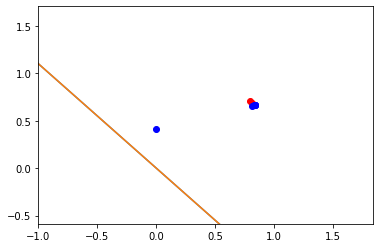

Bobot: [1.0, 0.16727907997448266, 0.06545460952747406, 1.5769012470369983]


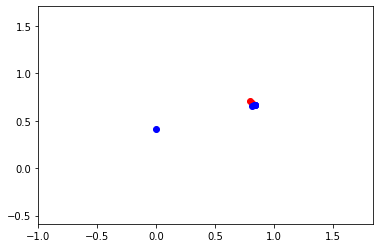

Bobot: [0.0, -0.6323622234178424, -0.6397765582585777, 1.0150431083557008]


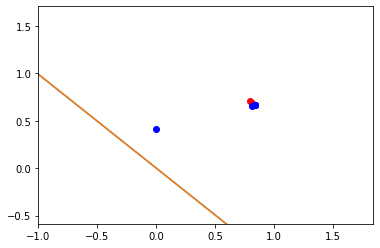


Epoch 6
Bobot: [1.0, 0.20242782448273866, 0.020817932191639965, 1.6756284425414358]


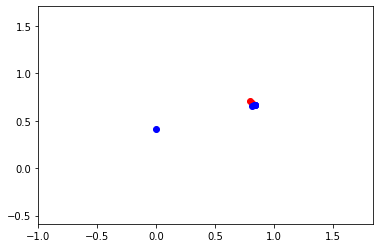

Bobot: [0.0, -0.6123596644377853, -0.6697376953495311, 1.0646872748035787]


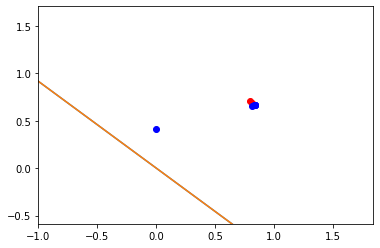

Bobot: [1.0, 0.20409821022308905, -0.013836837514187517, 1.7402308286622385]


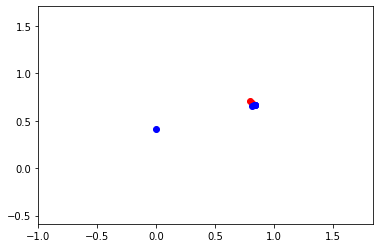

Bobot: [0.0, -0.595543093169236, -0.7190680053002393, 1.178372689980941]


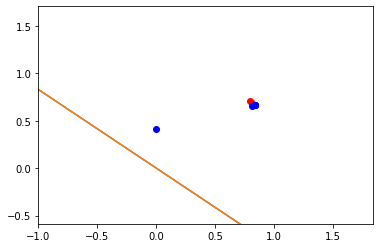


Epoch 7
Bobot: [1.0, 0.23924695473134505, -0.05847351485002161, 1.838958024166676]


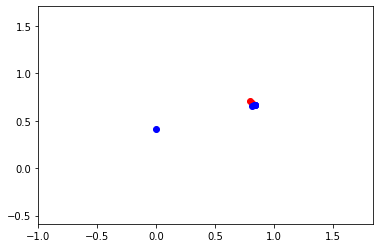

Bobot: [0.0, -0.5755405341891789, -0.7490291423911927, 1.2280168564288192]


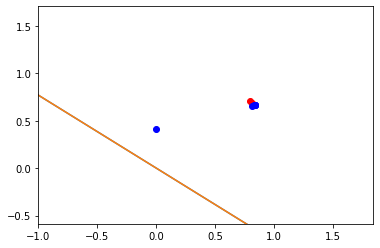

Bobot: [1.0, 0.24091734047169544, -0.0931282845558491, 1.903560410287479]


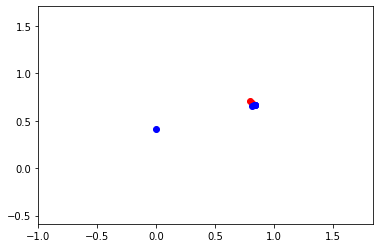

Bobot: [0.0, -0.5587239629206296, -0.7983594523419009, 1.3417022716061815]


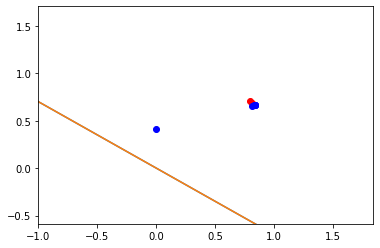


Epoch 8
Bobot: [1.0, 0.27606608497995144, -0.1377649618916832, 2.0022876057919166]


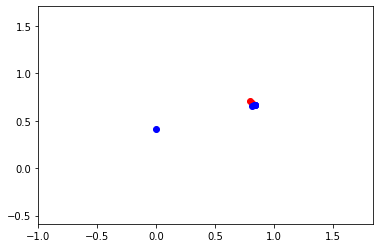

Bobot: [0.0, -0.5387214039405726, -0.8283205894328542, 1.3913464380540597]


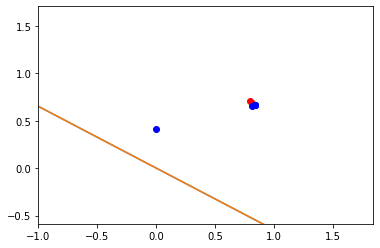

Bobot: [1.0, 0.27773647072030183, -0.17241973159751067, 2.0668899919127197]


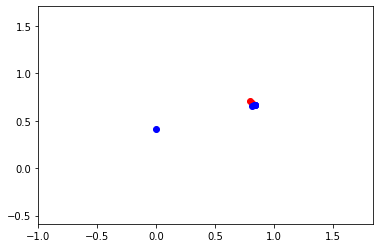

Bobot: [0.0, -0.5219048326720233, -0.8776508993835624, 1.5050318532314222]


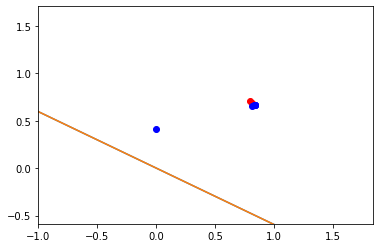


Epoch 9
Bobot: [1.0, 0.31288521522855783, -0.21705640893334477, 2.1656171874171575]


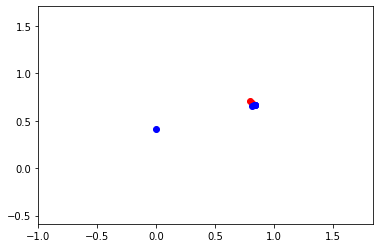

Bobot: [0.0, -0.5019022736919662, -0.9076120364745158, 1.5546760196793006]


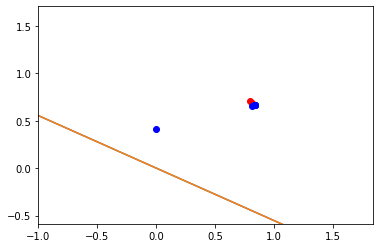

Bobot: [1.0, 0.34118634723460595, -0.24230482939680198, 2.205942074130019]


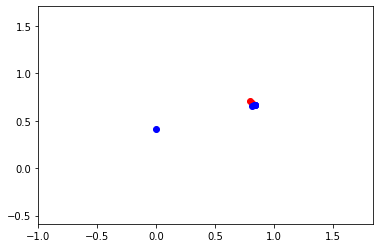

Bobot: [0.0, -0.45845495615771914, -0.9475359971828538, 1.6440839354487213]


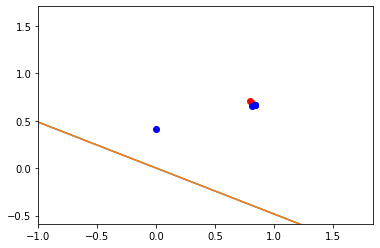

Bobot: [-1.0, -1.2904443803304506, -1.6075007449717724, 0.9781801748405692]


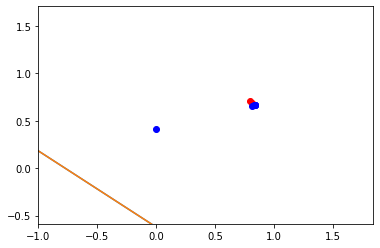


Epoch 10
Bobot: [0.0, -0.4556543324298695, -0.9469062545215547, 1.6387655090263042]


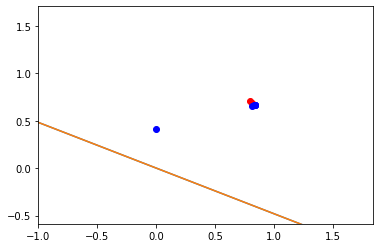

Bobot: [-1.0, -1.2876437566026009, -1.6068710023104735, 0.9728617484181521]


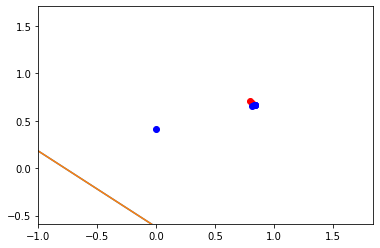

Epochs: 10
Accuracy: 0.4430379746835443


In [18]:
w, epoch = percep_fit(X_train, y_train, a=1, verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 1
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama kita membatasi max epoch menjadi 10. Perhatikan bobot dari kedua proses training di atas. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate yang di masukkan!

Jawab:

Jadi dari hasil yang didapatkan, hasil bobot dari learning rate "0.001" lebih rendah dari pada bobot hasil dari learning rate "1" hal ini mempengaruhi kecepatan konvergesi. dimana semakin besar learning rate, proses pembelajaran akan semakin lambat tetapi presisi, sedangkan dengan learning rate yang lebih besar akan sangat cepat tapi kurang presisi dalam aplikasinya